# 12.2. Simulating an elementary cellular automaton

In [1]:
import numpy as np
import matplotlib
import random
import matplotlib.pyplot as plt
%matplotlib inline

#source https://github.com/ipython-books/cookbook-2nd-code

# Print some velocity averages

In [2]:
# N = 1000
# L = 1000
# its = 1000
# eta_range = [2.0, 0.2, 0.02, 0.002, 0.0002]

# for eta in eta_range:
#     p = (N/L)
#     x = generate2(L, its, eta, p)
#     avg_velocity = []

#     for gen in x:
#         velocities = []
#         for vel in gen:  # only count the non-zero velocities
#             if vel != 0:
#                 velocities.append(vel)
#         avg_velocity.append(sum(velocities)/len(velocities))
#     plt.plot(avg_velocity, label=eta)

# plt.legend()
# plt.show()

## Particle density plot

In [3]:
def U(x_row, pos):
    neighbours = []
     
    # two nearest neighbours total 
    if pos == 0:
        neighbours_pos = [1, -1, pos]
    elif pos == len(x_row)-1:
        neighbours_pos = [0, -2, pos]
    else:
        neighbours_pos = [pos-1, pos, pos+1]  
    
    maj_velocity = 0
    for n in neighbours_pos:
        pos_list = x_row[n]
        for idx in range(len(pos_list)):
            maj_velocity += x_row[n][idx] # getting the velocity of every bird that is locates at this position
    
    if maj_velocity > 0:
        velocity_avg = +1
    elif maj_velocity < 0:
        velocity_avg = -1
    else:
        velocity_avg = 0
    
    return velocity_avg

def flock_step(x_row, eta, size):
    new_row = [ [] for _ in range(size) ]

    for pos, birds in enumerate(x_row):
        for bird in (birds):
            #chosen particle
            x_mu = pos  # location of bird
            v_mu = bird   # velocity of bird

            U_x = U(x_row, pos)

            W_u = (1-(1-2*eta)*v_mu*U_x)/2
            if v_mu == 0:
                continue

            if (random.random() < W_u):
                # We flip direction of bird
                if v_mu == -1:
                    vel_to_insert = 1
                    pos_to_insert = x_mu + vel_to_insert

                    # make sure we keep bounds in mind, insert in the beginning
                    if pos_to_insert > (len(x_row)-1):
                        pos_to_insert = 0
                else: # v_mu is 1
                    vel_to_insert = -1
                    pos_to_insert = x_mu + vel_to_insert
                
                new_row[pos_to_insert].append(vel_to_insert)
                
            else:
                # We do not flip, keep original velocity. But we do move the bird
                vel_to_insert = v_mu
                if (pos == (len(x_row)-1)) & (v_mu == 1): # move from right bound to left bound
                    pos_to_insert = 0
                else:
                    pos_to_insert = x_mu + v_mu
                
                new_row[pos_to_insert].append(vel_to_insert)
    
    #print('new row', new_row.shape)
    return new_row


def generate2(size, steps, eta, p):
    #x = np.empty((steps, size), dtype=object)
    x = [ [ [] for _ in range(size) ] for _ in range(steps) ]
    
    velocities  = np.random.choice([-1, 0, 1], size=size, p=[p/2, 1-p, p/2])
    velocities = velocities.tolist()

    for idx, v in enumerate(velocities):
        x[0][idx] = [v]
    
    for i in range(steps - 1):
        x[i + 1] = flock_step(x[i], eta, size)
        
    return x

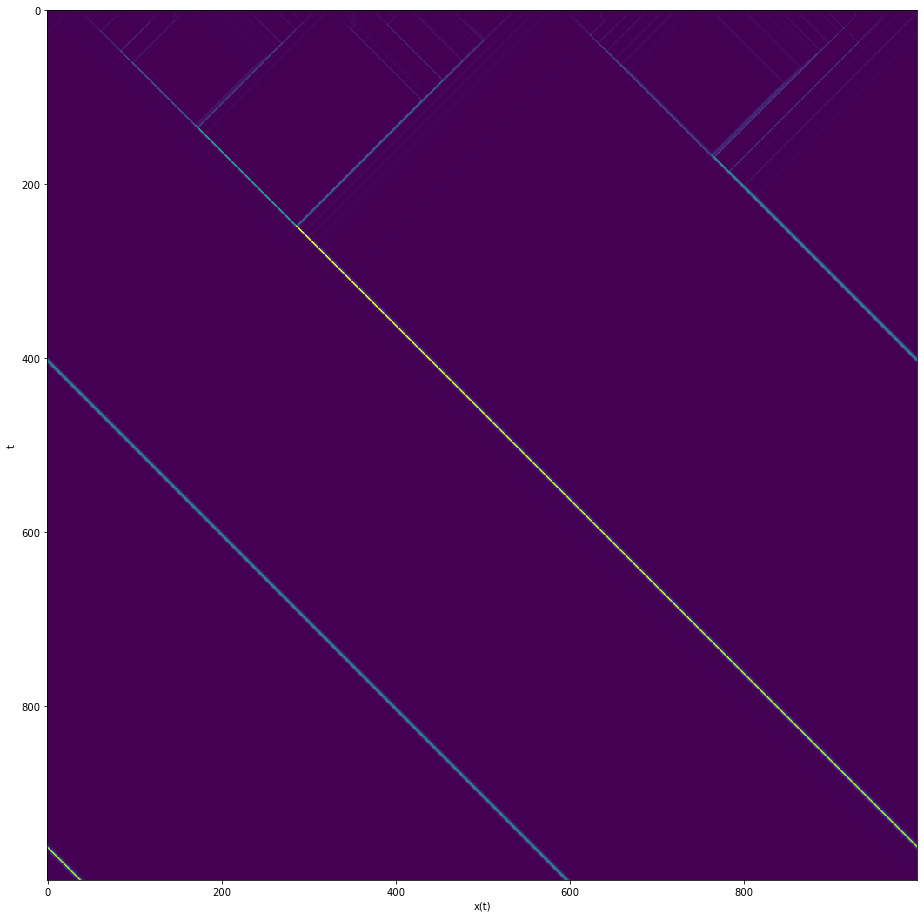

In [4]:
N = 1000
L = 1000
its = 1000
eta = 0.0002
p = (N/L)
x = generate2(L, its, eta, p)


def get_density_values(x):
    list_of_density = []
    for gens in x:
        density_row = []
        for pos in gens:
            density_row.append(len(pos))
        list_of_density.append(density_row)
    return list_of_density


density_x = get_density_values(x)

plt.figure(figsize=(20, 16))
plt.ylabel('t')
plt.xlabel('x(t)')
plt.imshow(density_x, interpolation='none')

In [5]:
# bifurcation plot
# logistic map
# variance in particle density


In [6]:
#print('one row of 1d plot', x[20])

In [ ]:
N = 1000
L = 1000
its = 1000
#eta_range = [2.0, 0.2, 0.02, 0.002, 0.0002]
eta_range = np.linspace(2.0, 0, 1000)
end_average_velocity = []

rounds = 0
for eta in eta_range:
    p = (N/L)
    x = generate2(L, its, eta, p)
    avg_velocity = []
    #endcap = np.arange(round(N*.9), N)
    #endcap = list(endcap)
    for gen in x:
        velocities = []
        #print(gen)
        for vel in gen:  # only count the non-zero velocities
            if vel == []:
                continue
            if vel != 0:
                velocities.append(int(vel[0]))
        avg_velocity.append((abs(sum(velocities)))/len(velocities))
    u = np.unique(avg_velocity[-10:])
    eta = eta*np.ones(len(u))
    plt.plot(eta, u, '.')
    end_average_velocity.append(np.mean(avg_velocity[-100:]))
    rounds += 1
    print("Percentage done:", (rounds/1000*100), '%')

plt.show()


In [ ]:
plt.plot(eta_range, end_average_velocity)
plt.xlabel('eta(n)')
#plt.xticks((0.0002, 0.02, 0.02))
plt.ylabel('Va')
plt.show()
